In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

pd.options.display.float_format = '{:f}'.format

In [167]:
full_df = pd.read_csv('cell2celltrain.csv')
full_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [168]:
df = full_df.dropna()
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,No,0.000000,76.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No
51037,3399906,No,31.920000,63.000000,17.000000,0.000000,43.000000,0.000000,-38.000000,-13.200000,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51040,3399942,No,71.990000,724.000000,70.000000,0.000000,4.000000,0.900000,-40.000000,-2.000000,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.490000,384.000000,30.000000,0.000000,250.000000,0.000000,0.000000,0.000000,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


In [169]:
cat_columns = []
for c in df.columns:
    if df[c].dtype == 'object':
        cat_columns.append(c)
        df[c] = df[c].astype('category')
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df

/var/folders/4s/hl9y6lqs3h1c9qxxnbjmtvsr0000gn/T/ipykernel_21182/3421557909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].astype('category')
/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,0,0,8,1,0,2,4,0
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,0,0,8,0,3,2,4,2
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,0,0,15,0,2,3,1,2
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,0,0,0,0,3,0,3,0
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,0,1,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,0,0.000000,76.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,4,0,0,15,0,1,0,4,0
51037,3399906,0,31.920000,63.000000,17.000000,0.000000,43.000000,0.000000,-38.000000,-13.200000,...,0,3,0,0,15,0,2,0,3,2
51040,3399942,0,71.990000,724.000000,70.000000,0.000000,4.000000,0.900000,-40.000000,-2.000000,...,0,7,0,0,15,0,0,0,4,1
51041,3399946,1,117.490000,384.000000,30.000000,0.000000,250.000000,0.000000,0.000000,0.000000,...,0,2,0,0,8,0,4,0,4,2


<AxesSubplot:>

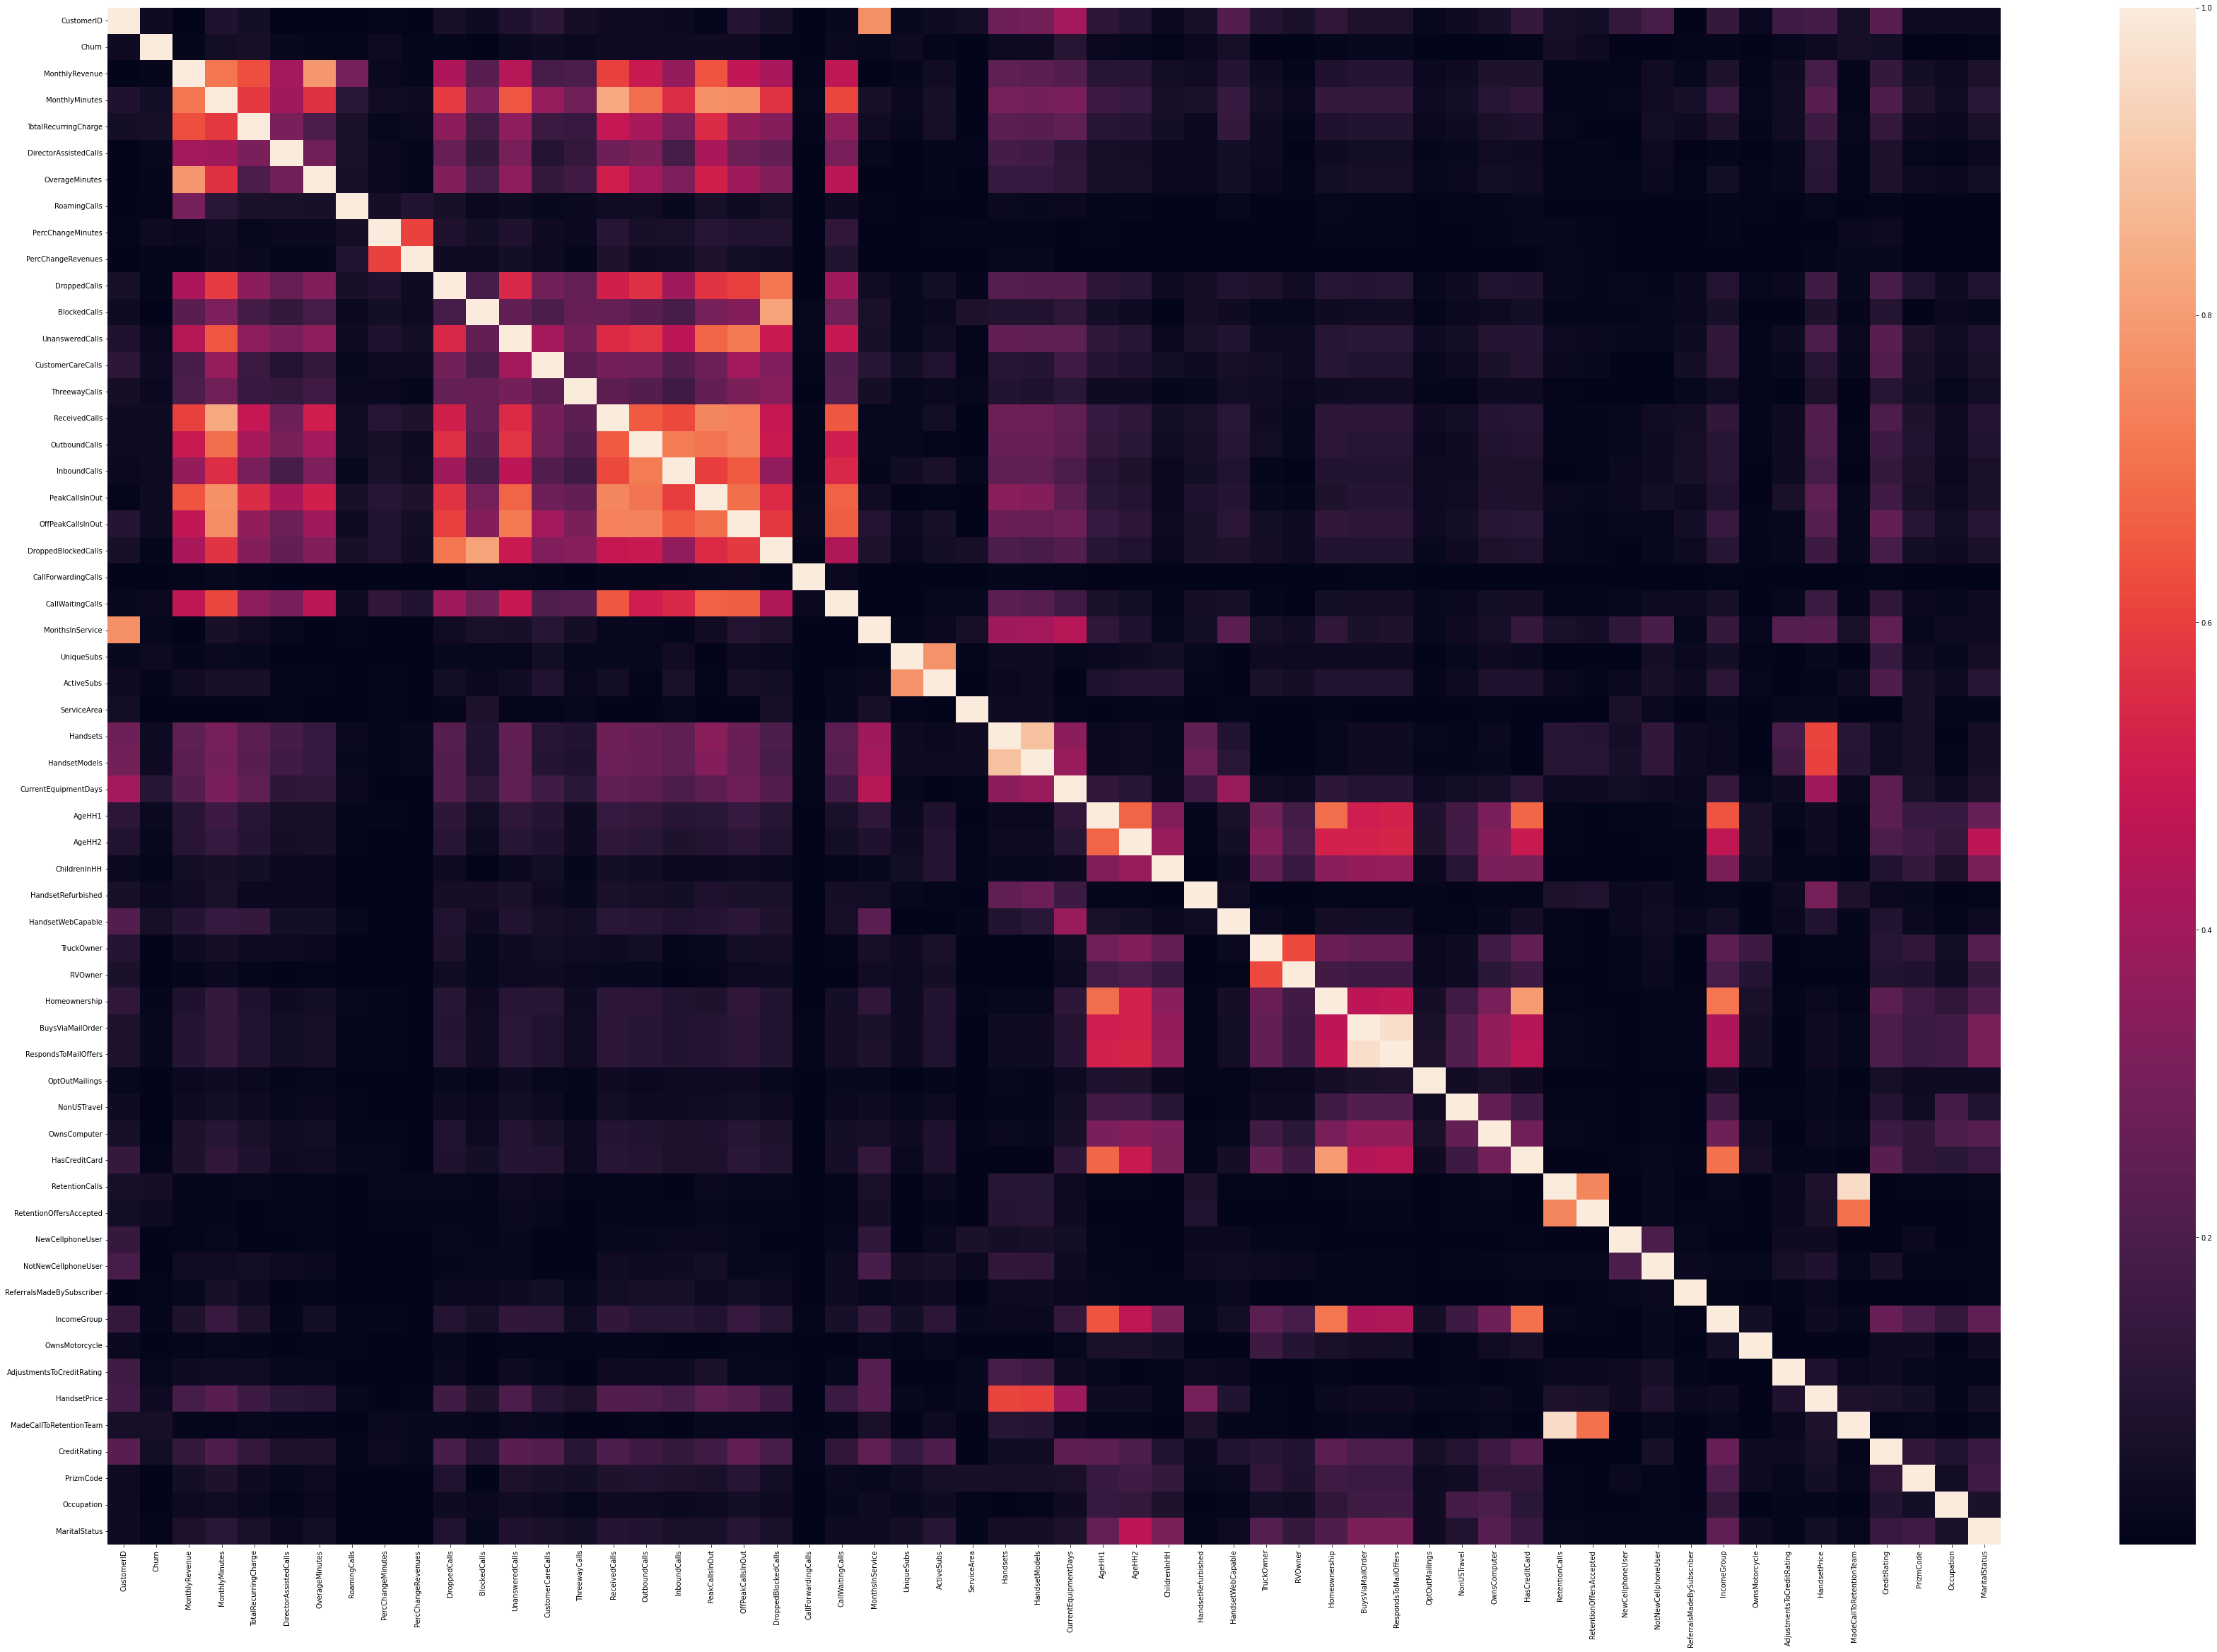

In [170]:
plt.figure(figsize = (60,40))
sns.heatmap(np.abs(df.corr()))

In [45]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

## Choose RV for analysis

In [171]:
target_features = ['MonthlyRevenue']

<AxesSubplot:>

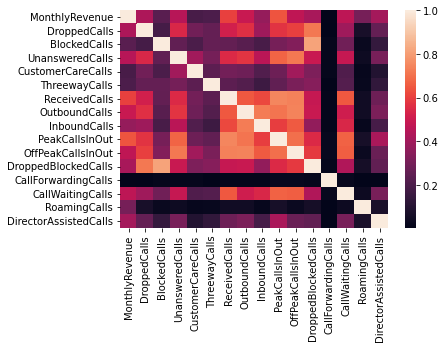

In [172]:
call_features = ['DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
                 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
                 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                 'CallForwardingCalls', 'CallWaitingCalls', 'RoamingCalls',
                 'DirectorAssistedCalls']
sns.heatmap(np.abs(df[target_features + call_features].corr()))

<AxesSubplot:>

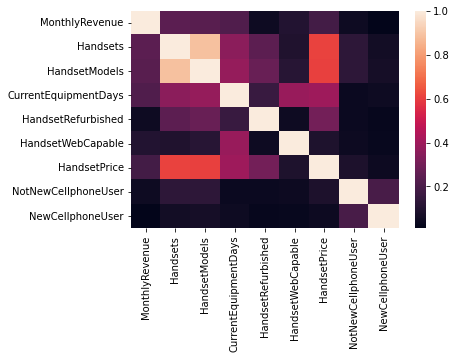

In [173]:
handset_features = ['Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'HandsetRefurbished', 
                    'HandsetWebCapable', 'HandsetPrice', 'NotNewCellphoneUser', 'NewCellphoneUser']

sns.heatmap(np.abs(df[target_features + handset_features].corr()))

<AxesSubplot:>

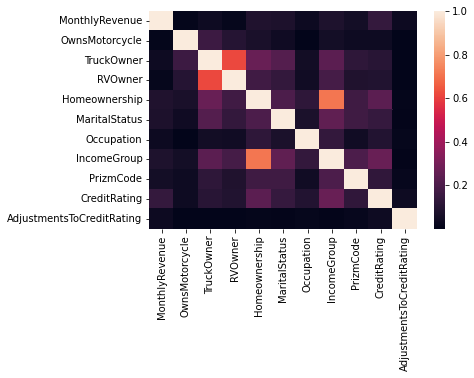

In [174]:
material_status = ['OwnsMotorcycle', 'TruckOwner', 'RVOwner', 'Homeownership',
                  'MaritalStatus', 'Occupation', 'IncomeGroup', 
                  'PrizmCode', 'CreditRating', 'AdjustmentsToCreditRating']
sns.heatmap(np.abs(df[target_features + material_status].corr()))

<AxesSubplot:>

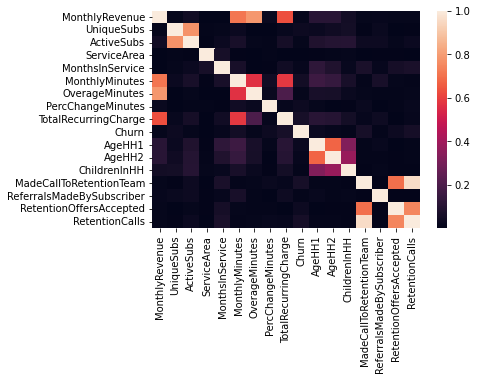

In [176]:
human_features = ['UniqueSubs', 'ActiveSubs', 'ServiceArea', 
                  'MonthsInService', 'MonthlyMinutes', 'OverageMinutes', 'PercChangeMinutes', 'TotalRecurringCharge', 'Churn',
                  'AgeHH1', 'AgeHH2', 'ChildrenInHH',
                  'MadeCallToRetentionTeam', 'ReferralsMadeBySubscriber', 'RetentionOffersAccepted', 'RetentionCalls']

sns.heatmap(np.abs(df[target_features + human_features].corr()))

In [177]:
predict_features = ['ReceivedCalls', 'OutboundCalls', 'PeakCallsInOut', 'CallWaitingCalls', 
            'CreditRating', 
            'Handsets', 'HandsetModels',
            'MonthlyMinutes', 'OverageMinutes', 'TotalRecurringCharge', 'Churn', 'AgeHH1', 'AgeHH2', 'ChildrenInHH'
           ]

## Step 1. Non-parametric estimation of PDF in form of histogram and using kernel density function for MRV .

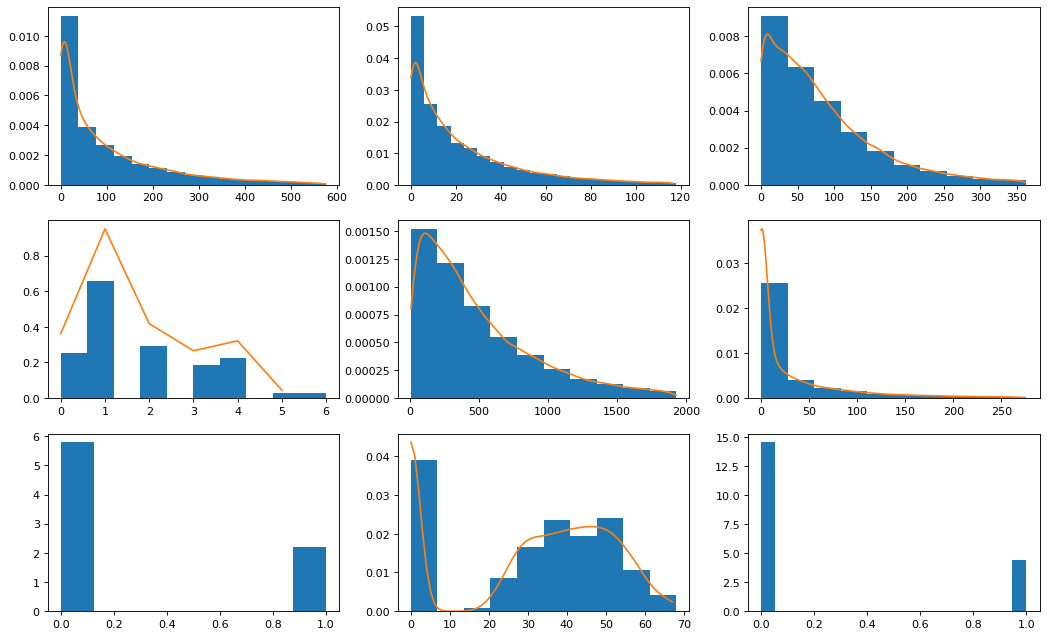

In [178]:
from scipy.stats import gaussian_kde, trimboth

def plot(feature, bins, index):
    plt.subplot(index)
    data = df[feature].dropna()
    d = data.to_numpy()
    d = trimboth(d, 0.025)
    plt.hist(d, bins=bins, density=True)

    kde = gaussian_kde(d)
    tiks = np.arange(d.min(), d.max(), 1)
    plt.plot(tiks, kde(tiks) )
    plt.title = feature
    
plt.figure(figsize=(16, 10), dpi=80)
plot('ReceivedCalls', 15, 331)
plot('OutboundCalls', 20, 332)
plot('PeakCallsInOut', 10, 333)
plot('CreditRating', 10, 334)
plot('MonthlyMinutes', 10, 335)
plot('OverageMinutes', 10, 336)
plot('Churn', 8, 337)
plot('AgeHH1', 10, 338)
plot('ChildrenInHH', 19, 339)

## Step 2. Estimation of multivariate mathematical expectation and variance.

In [179]:
for target_feature in target_features:
    print(f'{target_feature} mean={df[target_feature].mean()}')
    print(f'{target_feature} var={df[target_feature].var()}')

MonthlyRevenue mean=58.71737377391863
MonthlyRevenue var=1964.0181000916018


In [234]:
df_filtered = df[target_features + predict_features]

## Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

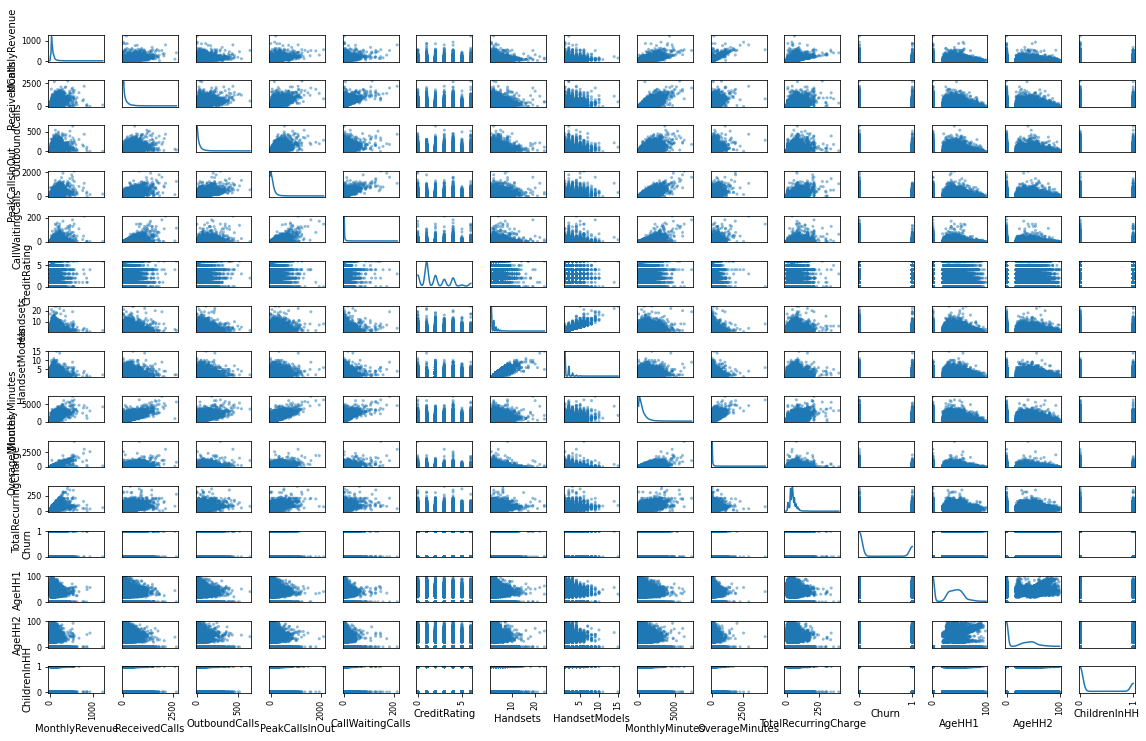

In [181]:
pd.plotting.scatter_matrix(df_filtered, figsize=(16, 10), diagonal='kde')
plt.tight_layout()
plt.show()

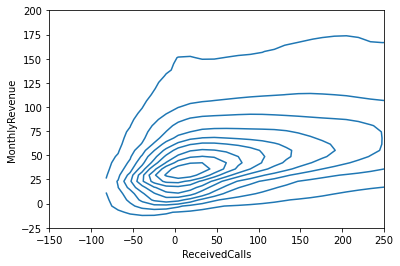

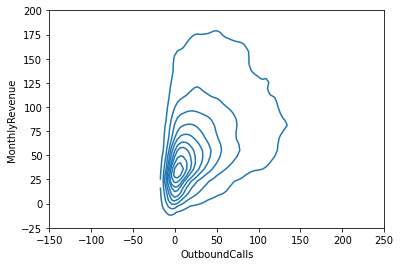

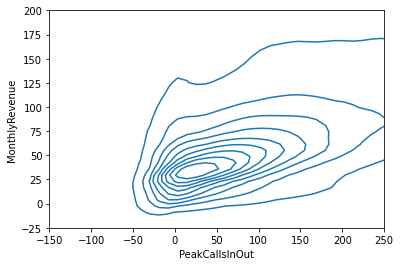

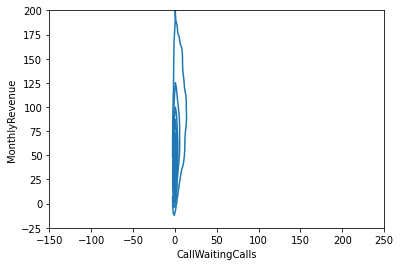

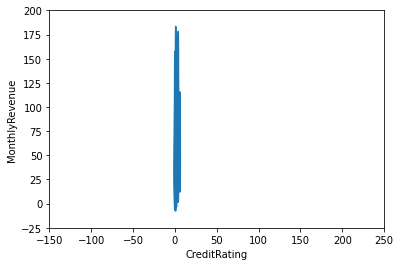

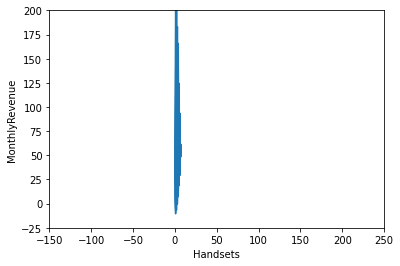

KeyboardInterrupt: 

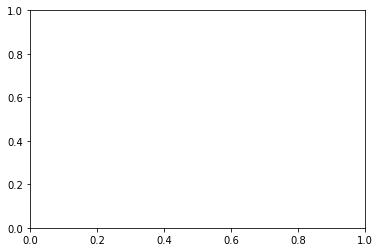

In [182]:
for target_feature in target_features:
    for predict_feature in predict_features:
        sns.kdeplot(data=df_filtered, x=predict_feature, y=target_feature)
        ax = plt.gca()
        ax.set_xlim([-150, 250])
        ax.set_ylim([-25, 200])
        plt.show()

Churn
0 Mean = 59.056027543864595 Var = 1971.5229544185506
1 Mean = 57.87324745524746 Var = 1944.4501576083067


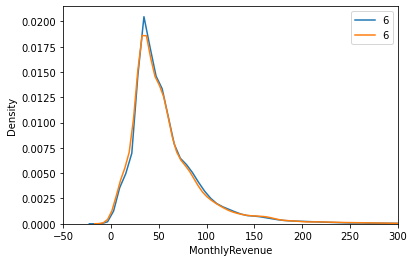

ChildrenInHH
0 Mean = 59.9365184216845 Var = 2058.6229479497897
1 Mean = 54.992767136685956 Var = 1656.7202133318967


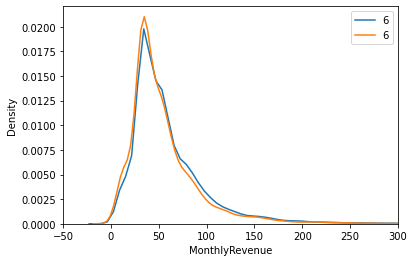

CreditRating
0 Mean = 52.580797084130026 Var = 1647.0818692223556
1 Mean = 52.59115878450674 Var = 1489.7808955058974
2 Mean = 62.67258241089892 Var = 2312.995597430099
3 Mean = 65.37610292710924 Var = 2077.630538139423
4 Mean = 71.07810284810127 Var = 2456.9288586094553
5 Mean = 67.24498285714286 Var = 2534.061891847532
6 Mean = 65.04224987798926 Var = 2923.0426060195623


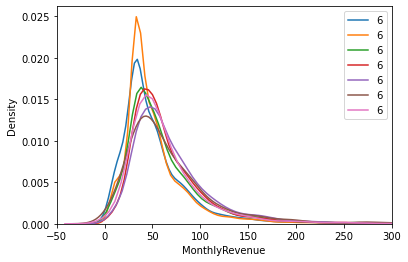

In [183]:
for target_feature in target_features:
    for cat_column in cat_columns:
        if cat_column not in df_filtered.columns:
            continue
        print(cat_column)
        for cat_column_value in np.unique(df[cat_column]):
            data = df_filtered[df_filtered[cat_column] == cat_column_value][target_feature]
            print(cat_column_value, "Mean =", data.mean(), "Var =", data.var())
            sns.kdeplot(data, label=credit_rating)
        ax = plt.gca()
        ax.set_xlim([-50, 300])
        plt.title = cat_columns
        plt.legend()
        plt.show()

## Step 4. Estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [184]:
df_filtered.corr()

,MonthlyRevenue,ReceivedCalls,OutboundCalls,PeakCallsInOut,CallWaitingCalls,CreditRating,Handsets,HandsetModels,MonthlyMinutes,OverageMinutes,TotalRecurringCharge,Churn,AgeHH1,AgeHH2,ChildrenInHH
MonthlyRevenue,1.000000,0.604762,0.495088,0.642019,0.469497,0.139504,0.243892,0.236179,0.712734,0.787317,0.629391,-0.012065,-0.108608,-0.105829,-0.048084
ReceivedCalls,0.604762,1.000000,0.652505,0.746857,0.649757,0.201088,0.280727,0.273996,0.828206,0.513705,0.482062,-0.037097,-0.143124,-0.123512,-0.052396
OutboundCalls,0.495088,0.652505,1.000000,0.710386,0.508858,0.161659,0.266607,0.266370,0.694517,0.404062,0.410429,-0.032489,-0.134659,-0.112953,-0.045569
PeakCallsInOut,0.642019,0.746857,0.710386,1.000000,0.668658,0.168677,0.344584,0.334804,0.772486,0.517419,0.552995,-0.039527,-0.110824,-0.096484,-0.026907
CallWaitingCalls,0.469497,0.649757,0.508858,0.668658,1.000000,0.125457,0.236854,0.225839,0.614970,0.457071,0.355959,-0.025509,-0.066831,-0.049235,-0.010860
CreditRating,0.139504,0.201088,0.161659,0.168677,0.125457,1.000000,0.046624,0.043022,0.206566,0.081122,0.134734,-0.047741,-0.235994,-0.197072,-0.090221
Handsets,0.243892,0.280727,0.266607,0.344584,0.236854,0.046624,1.000000,0.888262,0.303903,0.143777,0.235735,-0.033730,-0.023637,-0.034672,-0.021258
HandsetModels,0.236179,0.273996,0.266370,0.334804,0.225839,0.043022,0.888262,1.000000,0.293145,0.143102,0.226597,-0.040470,-0.026260,-0.034977,-0.020368
MonthlyMinutes,0.712734,0.828206,0.694517,0.772486,0.614970,0.206566,0.303903,0.293145,1.000000,0.569083,0.585375,-0.050165,-0.163928,-0.143321,-0.064239
OverageMinutes,0.787317,0.513705,0.404062,0.517419,0.457071,0.081122,0.143777,0.143102,0.569083,1.000000,0.201011,0.015301,-0.065212,-0.062350,-0.025528


<AxesSubplot:>

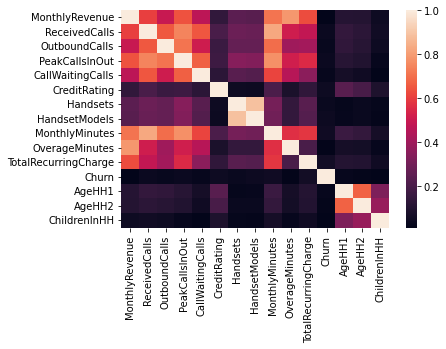

In [185]:
sns.heatmap(np.abs(df_filtered.corr()))

In [205]:
predict_features = ['ReceivedCalls', 'OutboundCalls', 'PeakCallsInOut', 'CallWaitingCalls','MonthlyMinutes', 
                    'OverageMinutes', 'TotalRecurringCharge']

In [206]:
df_filtered = df_filtered[predict_features + target_features].sample(n=5000)

In [207]:
from scipy.stats import pearsonr, norm

def pearsonr_ci(x, y, alpha=0.05):
    r, _ = pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1 / np.sqrt(x.size - 3)
    z = norm.ppf(1 - alpha / 2)
    lo_z, hi_z = r_z - z * se, r_z + z * se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, lo, hi

n = len(predict_features)
for i in range(n):
    for j in range(i + 1, n):
        cc, low, high = pearsonr_ci(df_filtered[predict_features[i]], df_filtered[predict_features[j]])
        print("CC [%f, %f] (%s, %s)" % (low, high, predict_features[i], predict_features[j]))

CC [0.647549, 0.678602] (ReceivedCalls, OutboundCalls)
CC [0.714379, 0.740472] (ReceivedCalls, PeakCallsInOut)
CC [0.623519, 0.656248] (ReceivedCalls, CallWaitingCalls)
CC [0.819395, 0.836807] (ReceivedCalls, MonthlyMinutes)
CC [0.447643, 0.490867] (ReceivedCalls, OverageMinutes)
CC [0.439543, 0.483174] (ReceivedCalls, TotalRecurringCharge)
CC [0.706565, 0.733260] (OutboundCalls, PeakCallsInOut)
CC [0.499078, 0.539556] (OutboundCalls, CallWaitingCalls)
CC [0.687241, 0.715402] (OutboundCalls, MonthlyMinutes)
CC [0.341674, 0.389695] (OutboundCalls, OverageMinutes)
CC [0.376020, 0.422613] (OutboundCalls, TotalRecurringCharge)
CC [0.640703, 0.672239] (PeakCallsInOut, CallWaitingCalls)
CC [0.754366, 0.777281] (PeakCallsInOut, MonthlyMinutes)
CC [0.473795, 0.515657] (PeakCallsInOut, OverageMinutes)
CC [0.502595, 0.542876] (PeakCallsInOut, TotalRecurringCharge)
CC [0.596886, 0.631405] (CallWaitingCalls, MonthlyMinutes)
CC [0.425209, 0.469545] (CallWaitingCalls, OverageMinutes)
CC [0.293498, 0

## Step 5. Task formulation for regression. Estimate multivariate correlation (target-predictors).

[Coefficient of multiple correlation](https://en.wikipedia.org/wiki/Coefficient_of_multiple_correlation)

In [235]:
target_feature = target_features[0]

In [236]:
df_filtered = df_filtered[(df_filtered[target_feature] > np.percentile(df_filtered[target_feature], 1)) & (df_filtered[target_feature] < np.percentile(df_filtered[target_feature], 99))]

In [237]:
X, y = df_filtered[predict_features], df_filtered[target_features[0]]

In [238]:
cxx = X.corr().to_numpy()
cxy = np.array([pearsonr(X[feature], y)[0] for feature in predict_features])
np.dot(np.dot(cxy.T, np.linalg.inv(cxx)), cxy)

0.8830432505328623

## Step 6. Regression model and analysis of multicollinearity and regularization 

In [239]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [241]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [242]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2  ",r2_score(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2   0.8839732407883043
RMSE 11.624023693096648


We tried to use only one of 2 highly correlated features, but the reseult became worse.

In [214]:
X_ = df[predict_features]
X_ = StandardScaler().fit(X_).transform(X_)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.33, random_state=42)
reg_ = LinearRegression().fit(X_train_, y_train_)
y_pred_ = reg_.predict(X_test_)
print("R2  ", r2_score(y_test, y_pred_))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_)))

ValueError: Found input variables with inconsistent numbers of samples: [49752, 5000]

In [215]:
from sklearn.linear_model import Lasso

reg_ = Lasso(alpha=0.01).fit(X_train, y_train)
y_pred = reg_.predict(X_test)
print("R2  ",r2_score(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2   0.8583892715678957
RMSE 17.083805484604472


       MonthlyRevenue
count    15975.000000
mean         7.036299
std          9.252771
min          0.000662
25%          2.000734
50%          4.970339
75%          8.249216
max        222.835330


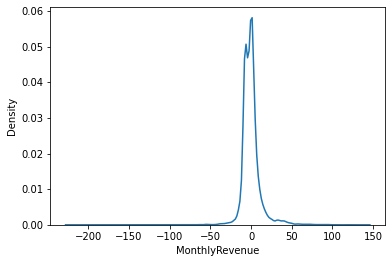

In [243]:
ax = plt.gca()
y_diff = y_test - y_pred
print(pd.DataFrame(np.abs(y_diff)).describe())
sns.kdeplot(y_diff)
plt.show()